In [61]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from collections import Counter
import matplotlib.pyplot as plt
from apyori import apriori

# 1. 정형 데이터마이닝
## lotto 데이터는 1회부터 859회까지의 로또 당첨번호(보너스 번호를 제외한 6개의 추첨번호)를 담고있는 데이터이며, 변수 설명은 아래와 같다.
### 1) 연관규칙분석을 수행하기 위해 lotto 데이터셋을 transaction 데이터로 변환하시오. 
### (단, 본 분석에서 로또번호가 추첨된 순서는 고려하지 않고 분석을 수행하도록 한다.)
### 그리고 변환된 데이터에서 가장 많이 등장한 상위 10개의 로또번호를 막대그래프로 출력하고 이에 대해 설명하시오.

In [62]:
lotto = pd.read_csv('lotto.csv')
lotto_1 = lotto.iloc[:,1:]
lotto_1

,num1,num2,num3,num4,num5,num6
0,8,22,35,38,39,41
1,9,13,32,38,39,43
2,6,10,16,28,34,38
3,10,24,40,41,43,44
4,8,15,17,19,43,44
...,...,...,...,...,...,...
854,16,24,29,40,41,42
855,14,27,30,31,40,42
856,11,16,19,21,27,31
857,9,13,21,25,32,42


In [63]:
# 데이터프레임.values[행,열] 형태로 특정 값만 추출할 수 있음
lotto_1.values[0,0]

8

In [64]:
# 트랜젝션 데이터로 변환하기 전에 데이터프레임을 2차원 리스트 형태로 변환 
lotto_list = []
for i in range(lotto_1.shape[0]):
    lotto_list.append([str(lotto_1.values[i,j]) for j in range(lotto_1.shape[1])])
te = TransactionEncoder()
te_ary = te.fit(lotto_list).transform(lotto_list)
lotto_te = pd.DataFrame(te_ary, columns=te.columns_)
lotto_te

,1,10,11,12,13,14,15,16,17,18,...,41,42,43,44,45,5,6,7,8,9
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,True,False,...,False,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,False,False,False
855,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
856,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
857,False,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True


In [65]:
lotto_te.columns

Index(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2',
       '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41',
       '42', '43', '44', '45', '5', '6', '7', '8', '9'],
      dtype='object')

<BarContainer object of 10 artists>

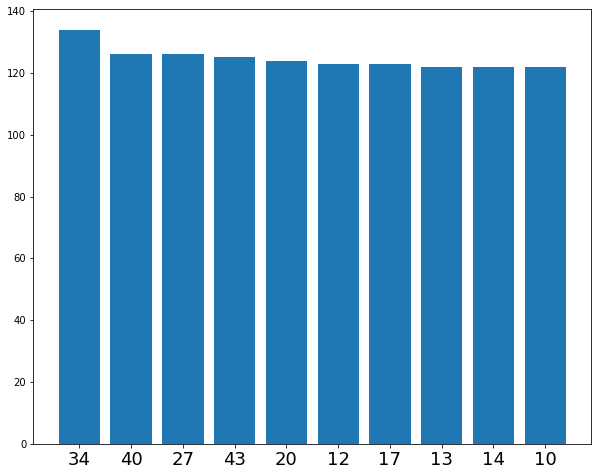

In [66]:
# 숫자별로 나온 횟수 count 해서 데이터프레임 생성
list_count = np.array(lotto_list).flatten().tolist()
count = Counter(list_count)
sorted_C_union = sorted(count.items(), key=lambda x: (-x[1], x[0]))
count_df = pd.DataFrame(sorted_C_union)

# 가장 많이 뽑힌 숫자 상위 10개 뽑기
count_df.rename(columns={0:'num', 1:'count'}, inplace=True)
count_df_10=count_df.sort_values(by='count', ascending=False)[:10]

# 시각화
plt.figure(figsize=(10,8))
plt.xticks(fontsize = 18 )
plt.bar(count_df_10['num'].values, count_df_10['count'].values)

### 2) 변환한 데이터에 대해 apriori함수를 사용하여 다음 괄호 안의 조건을 반영하여 연관규칙을 생성하고, 
### 이를 'rules_1'이라는 변수에 저장하여 결과를 해석하시오.
### (최소 지지도: 0.002, 최소 신뢰도: 0.8, 최소조합 항목수: 2개, 최대조합 항목 수 :6개)
### 그리고 도출된 연관규칙들을 향상도를 기준으로 내림차순 정렬하여 상위 30개의 규칙을 확인하고,
### 이를 데이터프레임으로 변환하여 csv파일로 출력하시오.

In [104]:
from mlxtend.frequent_patterns import apriori
#최소 지지도 0.002 
itemsets_s = apriori(lotto_te, min_support=0.002,  use_colnames=True)
#최소 신뢰도 0.8를 위한 작업
itemsets_s_c = association_rules(itemsets_s, metric="confidence", min_threshold=0.8)
itemsets_s_c['antecedent_len'] = itemsets_s_c.apply(lambda x: len(x['antecedents']), axis=1)
itemsets_s_c['consequent_len'] = itemsets_s_c.apply(lambda x: len(x['consequents']), axis=1)
rules_1 = itemsets_s_c[(itemsets_s_c['antecedent_len'] >= 2) & (itemsets_s_c['antecedent_len'] <= 6)]
rules_1_30 = rules_1.sort_values(by='lift', ascending=False)[:30]
rules_1_30

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequent_len
700,"(24, 34, 22)","(31, 7)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf,3,2
699,"(34, 31, 7)","(24, 22)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf,3,2
685,"(26, 16, 31)","(43, 36)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf,3,2
703,"(24, 31, 22)","(34, 7)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,3,2
667,"(14, 26, 21)","(18, 15)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,3,2
637,"(34, 36, 10)","(22, 44)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,3,2
652,"(24, 20, 15)","(12, 30)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,3,2
686,"(43, 26, 16)","(36, 31)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,3,2
688,"(43, 36, 16)","(26, 31)",0.002328,0.015134,0.002328,1.0,66.076923,0.002293,inf,3,2
638,"(34, 10, 22)","(36, 44)",0.002328,0.016298,0.002328,1.0,61.357143,0.002290,inf,3,2


In [105]:
rules_1_30.to_csv('rules_1_df.csv',header=True, index=False)

### 3) 생성된 연관규칙 'rules_1'에 대한 정보를 해석하고, 1)번 문제를 통해 확인했을 때 
### 가장 많이 추첨된 번호가 우측항에 존재하는 규칙들만을 'rules_most_freq'라는 변수에 저장하시오.
### 그리고 해당 규칙들을 해석하여 인사이트를 도출한 후 서술하시오.

In [106]:
# 생성된 연관규칙 rules_1 에 대한 정보를 해석_1
rules_1.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequent_len
count,704.000000,704.000000,704.000000,704.0,704.000000,704.000000,704.0,704.000000,704.000000
mean,0.002363,0.131062,0.002363,1.0,9.297555,0.002053,inf,3.066761,1.035511
std,0.000198,0.023771,0.000198,0.0,9.994010,0.000177,NaN,0.249786,0.185200
min,0.002328,0.012806,0.002328,1.0,6.410448,0.001965,inf,3.000000,1.000000
25%,0.002328,0.129220,0.002328,1.0,7.040984,0.001998,inf,3.000000,1.000000
50%,0.002328,0.136205,0.002328,1.0,7.341880,0.002014,inf,3.000000,1.000000
75%,0.002328,0.142026,0.002328,1.0,7.738739,0.002028,inf,3.000000,1.000000
max,0.003492,0.155995,0.003492,1.0,78.090909,0.003098,inf,4.000000,2.000000


In [109]:
# 생성된 연관규칙 rules_1 에 대한 정보를 해석_2
rules_1['a_c_len'] = rules_1['antecedent_len'] + rules_1['consequent_len']
rules_1.a_c_len.value_counts()
## 총 704개의 연관규칙이 도출되었으며, 632개의 규칙은 4개의 로또번호로 구성되었고 72개의 규칙은 5개의 번호로 구성되었다. 
## 규칙들에 대한 향상도의 최솟값은 6.41로 꽤 높게 나타났으며, 추첨번호들의 교집합 확률을 의미하는 지지도의 평균은 약 0.002로 나타났다.


4    632
5     72
Name: a_c_len, dtype: int64

In [99]:
# 로또 데이터에서 가장 많이 등장한 추첨번호 '34'가 우측항에 존재하는 규칙들만을 추출하여 저장
list(rules_1['consequents'][0])[0]
rules_1['tf'] = rules_1.apply(lambda x: 1 if '34' in list(x['consequents']) else 0, axis=1)
rules_1_34 = rules_1[rules_1['tf']==1]
rules_1_34

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,tf
21,"(13, 5, 1)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1
181,"(12, 36, 37)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1
224,"(13, 5, 29)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1
268,"(25, 14, 44)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1
289,"(41, 19, 15)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1
294,"(2, 21, 15)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1
298,"(2, 28, 15)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1
391,"(17, 29, 5)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1
394,"(17, 32, 33)",(34),0.003492,0.155995,0.003492,1.0,6.410448,0.002948,inf,3,1
396,"(17, 42, 45)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1


In [ ]:
## 결과 해석
##

In [ ]:
# 방법 2
association_rules = apriori(lotto_list, min_support = 0.002, min_confidence = 0.8, min_length = 2, max_length=6)
association_result = list(association_rules)
association_result

In [17]:
association_result[0]

RelationRecord(items=frozenset({'17', '31', '10', '1'}), support=0.002328288707799767, ordered_statistics=[OrderedStatistic(items_base=frozenset({'17', '10', '1'}), items_add=frozenset({'31'}), confidence=1.0, lift=7.279661016949152), OrderedStatistic(items_base=frozenset({'31', '10', '1'}), items_add=frozenset({'17'}), confidence=1.0, lift=6.983739837398374)])

In [37]:
association_result[3]

RelationRecord(items=frozenset({'11', '5', '18', '1'}), support=0.002328288707799767, ordered_statistics=[OrderedStatistic(items_base=frozenset({'11', '5', '1'}), items_add=frozenset({'18'}), confidence=1.0, lift=7.099173553719009), OrderedStatistic(items_base=frozenset({'11', '5', '18'}), items_add=frozenset({'1'}), confidence=1.0, lift=7.040983606557377)])

In [18]:
association_result[0][0]

frozenset({'1', '10', '17', '31'})

In [19]:
association_result[0][1]  # support

0.002328288707799767

In [22]:
association_result[0][2][0][2]

1.0

In [24]:
for rt in association_result:
    print(rt[0])
    items = [x for x in rt[0]]
    print(items[0] + " -> " + items[1])
    print("support = " + str(rt[1]))
    print("confidence = " + str(rt[2][0][2]))
    print("lift = " + str(rt[2][0][3]))
    print()

frozenset({'17', '31', '10', '1'})
17 -> 31
support = 0.002328288707799767
confidence = 1.0
lift = 7.279661016949152

frozenset({'40', '20', '10', '1'})
40 -> 20
support = 0.002328288707799767
confidence = 1.0
lift = 7.040983606557377

frozenset({'14', '11', '26', '1'})
14 -> 11
support = 0.002328288707799767
confidence = 1.0
lift = 7.405172413793103

frozenset({'11', '5', '18', '1'})
11 -> 5
support = 0.002328288707799767
confidence = 1.0
lift = 7.099173553719009

frozenset({'11', '21', '44', '1'})
11 -> 21
support = 0.002328288707799767
confidence = 1.0
lift = 7.601769911504425

frozenset({'12', '23', '18', '1'})
12 -> 23
support = 0.002328288707799767
confidence = 1.0
lift = 6.983739837398374

frozenset({'12', '23', '7', '1'})
12 -> 23
support = 0.002328288707799767
confidence = 1.0
lift = 8.676767676767676

frozenset({'9', '12', '23', '1'})
9 -> 12
support = 0.002328288707799767
confidence = 1.0
lift = 6.983739837398374

frozenset({'12', '28', '41', '1'})
12 -> 28
support = 0.00232

In [33]:
final_df = pd.DataFrame()
for rt in association_result:
#     print(rt[0])
    items = [x for x in rt[0]]
    result_df = pd.DataFrame({'frozenset':[rt[0]],
                              'relation': f"{items[0]} -> {items[1]}",
                              'support': rt[1],
                              'confidence': rt[2][0][2],
                              'lift': rt[2][0][3]
                             })
    final_df = final_df.append(result_df)
final_df.reset_index(inplace=True,drop=True)
final_df

,frozenset,relation,support,confidence,lift
0,"(17, 31, 10, 1)",17 -> 31,0.002328,1.0,7.279661
1,"(40, 20, 10, 1)",40 -> 20,0.002328,1.0,7.040984
2,"(14, 11, 26, 1)",14 -> 11,0.002328,1.0,7.405172
3,"(11, 5, 18, 1)",11 -> 5,0.002328,1.0,7.099174
4,"(11, 21, 44, 1)",11 -> 21,0.002328,1.0,7.601770
...,...,...,...,...,...
389,"(30, 31, 27, 40, 14)",30 -> 31,0.002328,1.0,53.687500
390,"(34, 21, 44, 15, 19)",34 -> 21,0.002328,1.0,40.904762
391,"(26, 31, 43, 36, 16)",26 -> 31,0.002328,1.0,78.090909
392,"(45, 31, 6, 38, 18)",45 -> 31,0.002328,1.0,57.266667


In [34]:
final_df_30 = final_df.sort_values(by='lift', ascending=False)[:30]
final_df_30

,frozenset,relation,support,confidence,lift
391,"(26, 31, 43, 36, 16)",26 -> 31,0.002328,1.0,78.090909
393,"(34, 31, 7, 24, 22)",34 -> 31,0.002328,1.0,71.583333
388,"(26, 21, 15, 14, 18)",26 -> 21,0.002328,1.0,71.583333
384,"(34, 36, 44, 22, 10)",34 -> 36,0.002328,1.0,61.357143
385,"(26, 21, 36, 17, 11)",26 -> 21,0.002328,1.0,61.357143
386,"(30, 12, 15, 24, 20)",30 -> 12,0.002328,1.0,57.266667
392,"(45, 31, 6, 38, 18)",45 -> 31,0.002328,1.0,57.266667
389,"(30, 31, 27, 40, 14)",30 -> 31,0.002328,1.0,53.687500
387,"(13, 26, 43, 40, 14)",13 -> 26,0.002328,1.0,45.210526
390,"(34, 21, 44, 15, 19)",34 -> 21,0.002328,1.0,40.904762
